In [1]:
from param_analysis import ParameterAnalysis
from plots import *

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:

connectedness_values = [0.2,0.3,0.4,0.6,0.8]
ecb_precision_gammas = [1,2,3,4,5,6,7,8,9]

num_agent_values = [4,6,8,10]


env_precision_gammas = [10]
b_precision_gammas = [5]

n_trials = 30

In [4]:
params = ParameterAnalysis('results/all_results3.npz','results/params2.npz', num_agent_values, connectedness_values, ecb_precision_gammas, env_precision_gammas, b_precision_gammas, n_trials)

In [5]:
params.n_d.value = num_agent_values[1]
params.env_d.value = env_precision_gammas[0]
params.b_d.value = b_precision_gammas[0]
params.c_d.value = connectedness_values[1]
params.ecb_d.value = ecb_precision_gammas[-2]

In [6]:
params.get_overall_metrics()

/vol/bitbucket/att21/venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/vol/bitbucket/att21/venv/lib/python3.8/site-packages/numpy/core/_methods.py:180: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
/vol/bitbucket/att21/venv/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [7]:
#What is happening to the individual agents in a simulation that forms clusters? 

In [7]:
lowest_db_index = np.where(params.db_indices == min(params.db_indices))[0][0]

print("Lowest DB index")
db_params = list(params.get_param_combinations())[lowest_db_index]
print(db_params)
print(params.db_indices[lowest_db_index])

Lowest DB index
(8, 0.2, 9, 5, 10)
0.008470608982432817


In [8]:
params.all_qs.shape

(30, 50, 2, 10)

In [9]:
clustering_data = {}

for c in connectedness_values:
    #find all parameter combinations with this connectedness value
    c_indices = np.where(np.isin(np.array(list(params.get_param_combinations()))[:,1],c))[0]
    #what are the db indices for these parameters?
    c_db_indices = params.db_indices[c_indices]
    #what is the smallest one?
    lowest_db_index = np.where(c_db_indices == min(c_db_indices))[0][0]
    highest_db_index = np.where(c_db_indices == max(c_db_indices))[0][0]
    #print(c_db_indices[lowest_db_index])
    
    #what is the parameter combination that results in the smallest one?
    optimal_params = list(params.get_param_combinations())[c_indices[lowest_db_index]]
    suboptimal_params = list(params.get_param_combinations())[c_indices[highest_db_index]]
    
    clustering_data[c] = {"optimal_params" : optimal_params, "lowest_db":c_db_indices[lowest_db_index],
                         "suboptimal_params": suboptimal_params, "highest_db" : c_db_indices[highest_db_index]}



In [10]:
#officially confirmed that high ECB leads to clustering, low ECB leads to no clustering. 
#any sparseness can lead to clustering, but generally lots of agents in a sparse graphleads to clustering, and less agents in a non sparse graph leads to no clustering

#the question now is: why?

In [11]:
clustering_data

{0.2: {'optimal_params': (8, 0.2, 9, 5, 10),
  'lowest_db': 0.008470608982432817,
  'suboptimal_params': (4, 0.2, 3, 5, 10),
  'highest_db': 0.23511091485022068},
 0.3: {'optimal_params': (10, 0.3, 9, 5, 10),
  'lowest_db': 0.018684413448631976,
  'suboptimal_params': (6, 0.3, 2, 5, 10),
  'highest_db': 0.25413951010268915},
 0.4: {'optimal_params': (10, 0.4, 9, 5, 10),
  'lowest_db': 0.01401880950085962,
  'suboptimal_params': (10, 0.4, 2, 5, 10),
  'highest_db': 0.19985102993542567},
 0.6: {'optimal_params': (10, 0.6, 9, 5, 10),
  'lowest_db': 0.009453297162992138,
  'suboptimal_params': (4, 0.6, 5, 5, 10),
  'highest_db': 0.19949470333235503},
 0.8: {'optimal_params': (10, 0.8, 9, 5, 10),
  'lowest_db': 0.011947910922676901,
  'suboptimal_params': (8, 0.8, 2, 5, 10),
  'highest_db': 0.2192160625402307}}

In [78]:
#what does the best clustering look like?
optimal_params = [8, 0.2, 9, 5, 10]
params.update_params(optimal_params)
params.get_all_sim_results_from_parameters()

IndexError: index 2 is out of bounds for axis 1 with size 1

In [86]:
beliefs = params_b.all_qs

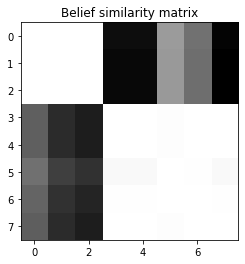

<Figure size 432x288 with 0 Axes>

In [98]:
kld_matrices = similarity_matrix(beliefs[16,:,:,:])

In [ ]:
worst_params = [6, 0.3, 2, 5, 10]
params.update_params(worst_params)
params.get_all_sim_results_from_parameters()
beliefs = params.all_qs
kld_matrices = similarity_matrix(beliefs[6,:,:,:])

In [81]:
def similarity_matrix(belief_hist):
    T = belief_hist.shape[0]

    KLD_intra_beliefs = get_KLDs(belief_hist)
    believers = np.where(belief_hist[-1,0,:] > 0.5)
    nonbelievers = np.where(belief_hist[-1,0,:] < 0.5)
    cluster_sorted_indices = [i for i in believers[0]]
    for j in nonbelievers[0]:
        cluster_sorted_indices.append(j)

    
    color_map = plt.cm.get_cmap('gray').reversed()


    single_slice = KLD_intra_beliefs[:,:,-1]
    sorted_slice = single_slice[cluster_sorted_indices,:][:,cluster_sorted_indices]
    plt.imshow(sorted_slice, cmap = color_map)
    plt.title("Belief similarity matrix")
    plt.show()
    plt.clf()

In [14]:
#General question: Do agents who are connected usually end up in the same cluster? 

#just get two lists, the cluster lists, and then the connnected lists ?

In [24]:

connectedness_values = [0.2]
ecb_precision_gammas = [9]

num_agent_values = [8]

n = len(num_agent_values)
c = len(connectedness_values)
#precision_ranges = [[1,2],[1,5],[1,9],[6,7],[6,10]]
env_precision_gammas = [10]
b_precision_gammas = [5]


In [25]:
params_b = ParameterAnalysis('results/results_best.npz','results/params_best.npz', num_agent_values, connectedness_values, ecb_precision_gammas, env_precision_gammas, b_precision_gammas, n_trials)

In [26]:
params_b.n_d.value = optimal_params[0]
params_b.env_d.value = 10
params_b.b_d.value = 5
params_b.c_d.value = optimal_params[1]
params_b.ecb_d.value = optimal_params[2]

In [27]:
params_b.sim_results.shape

(30, 1, 1, 1, 1, 1)

In [28]:
params_b.get_overall_metrics()

In [43]:
params_b.param_results[29,0,0,0,0,0][3]

[array(7.70134604),
 array(11.12167304),
 array(6.44780424),
 array([[0.73105858, 0.26894142],
        [0.26894142, 0.73105858]])]

In [23]:
def is_connected(adj_mat):
    return np.where(adj_mat == 1)

In [64]:
utils.softmax(np.eye(2) * 1.0)

NameError: name 'utils' is not defined

In [24]:
#now we want to investigate what happened during the best simulation

In [44]:
result = params_b.get_all_sim_results_from_parameters()

In [45]:
all_beliefs = result['all_qs']

In [60]:
params_b.db_indices

array([0.70191633])

In [74]:
trial = 10

In [75]:
#what are the clusters? 
all_beliefs_t = all_beliefs[trial,:,:,:] 
cluster1 = np.where(all_beliefs_t[-1,0,:] > 0.5)
cluster2 = np.where(all_beliefs_t[-1,0,:] < 0.5)

In [76]:
cluster1

(array([4, 6]),)

In [77]:
cluster2

(array([0, 1, 2, 3, 5, 7]),)

In [32]:
#let's examine one agent 
agent_1_adj_mat = result['adj_mat'][:,0,:]
agent_1_beliefs = result['all_qs'][:,:,:,0]
agent_1_samplings = result['all_neighbour_sampling'][:,:,0]
agent_1_tweets = result['all_tweets'][:,:,0]

In [33]:
result['all_tweets'].shape

(30, 51, 8)

In [34]:
neighbours = list(is_connected(agent_1_adj_mat[0])[0])

In [35]:
neighbours

[2, 3, 6, 7]

In [36]:
neighbours_in_cluster = [6]

In [37]:
#let's examine by timestep and trial
trial = 29

In [38]:
agent_1_adj_mat[trial]

array([0., 0., 1., 1., 0., 0., 1., 1.])

In [39]:
agent_1_beliefs[trial,:,0]

array([0.52555634, 0.58533325, 0.54600396, 0.63458808, 0.59682152,
       0.55310936, 0.62168237, 0.57539327, 0.53933584, 0.4974137 ,
       0.45095722, 0.40196847, 0.35508665, 0.39560673, 0.43909577,
       0.38931917, 0.34183073, 0.29577339, 0.25354451, 0.21469814,
       0.23510157, 0.19863717, 0.21879381, 0.18411801, 0.15373426,
       0.12729452, 0.10478116, 0.11384827, 0.10430214, 0.09319521,
       0.08109066, 0.06885552, 0.05731817, 0.04702111, 0.03850028,
       0.03146316, 0.02556451, 0.02074855, 0.02284531, 0.01856084,
       0.01502975, 0.01216238, 0.00982769, 0.00792628, 0.00639069,
       0.00694762, 0.00560825, 0.00452261, 0.0036467 , 0.00293692])

In [40]:
agent_1_samplings[trial]

array([3., 3., 7., 7., 2., 2., 6., 2., 7., 7., 7., 2., 7., 6., 3., 2., 7.,
       2., 7., 2., 6., 7., 3., 2., 7., 2., 7., 6., 3., 3., 3., 3., 3., 3.,
       2., 7., 3., 2., 6., 7., 3., 2., 7., 3., 2., 6., 7., 3., 2., 7., 3.])

In [41]:
agent_1_tweets[trial]

array([1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [42]:
agent_1_reads = [result['all_tweets'][trial,t,int(s)] for t, s in enumerate(agent_1_samplings[trial])]


In [43]:
list(agent_1_reads)

[1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [44]:
behaviour = [( agent_1_tweets[trial][t], agent_1_reads[t], agent_1_beliefs[trial,:,0][t], (agent_1_beliefs[trial,:,0][t] - agent_1_beliefs[trial,:,0][t-1] > 0)) for t in range(1,len(agent_1_reads)-1)]

In [45]:
behaviour

[(1.0, 1.0, 0.5853332496341213, True),
 (0.0, 0.0, 0.5460039644182318, False),
 (0.0, 1.0, 0.6345880817490547, True),
 (0.0, 0.0, 0.5968215172264043, False),
 (0.0, 0.0, 0.5531093604155469, False),
 (0.0, 1.0, 0.6216823736991259, True),
 (0.0, 0.0, 0.5753932677543248, False),
 (0.0, 0.0, 0.5393358419179314, False),
 (0.0, 0.0, 0.4974137016337946, False),
 (1.0, 0.0, 0.45095722291484563, False),
 (1.0, 0.0, 0.4019684663059338, False),
 (1.0, 0.0, 0.3550866517057321, False),
 (1.0, 1.0, 0.39560673468942603, True),
 (1.0, 1.0, 0.43909576660059985, True),
 (1.0, 0.0, 0.3893191708684024, False),
 (1.0, 0.0, 0.34183072800675235, False),
 (1.0, 0.0, 0.29577338718358626, False),
 (1.0, 0.0, 0.25354451326251354, False),
 (1.0, 0.0, 0.21469813553355557, False),
 (1.0, 1.0, 0.2351015685901186, True),
 (1.0, 0.0, 0.19863717022775532, False),
 (1.0, 1.0, 0.21879380852871866, True),
 (1.0, 0.0, 0.18411801027271657, False),
 (1.0, 0.0, 0.1537342596024888, False),
 (1.0, 0.0, 0.1272945165264517, False

In [46]:
#there is something wrong here, which is
#whenever I read tweet 0, my beliefs in the idea decrease
#whenever my beliefs in the idea are less than 0.5, I tweet 1
#why does that happen

In [47]:
#is there a correlation between tweets and beliefs?
for i, tup in enumerate(behaviour[1:]):
    print(tup[1])
    print(tup[2] - behaviour[i][2] > 0)
    print()

0.0
False

1.0
True

0.0
False

0.0
False

1.0
True

0.0
False

0.0
False

0.0
False

0.0
False

0.0
False

0.0
False

1.0
True

1.0
True

0.0
False

0.0
False

0.0
False

0.0
False

0.0
False

1.0
True

0.0
False

1.0
True

0.0
False

0.0
False

0.0
False

0.0
False

1.0
True

0.0
False

0.0
False

0.0
False

0.0
False

0.0
False

0.0
False

0.0
False

0.0
False

0.0
False

0.0
False

1.0
True

0.0
False

0.0
False

0.0
False

0.0
False

0.0
False

0.0
False

1.0
True

0.0
False

0.0
False

0.0
False

0.0
False



In [48]:
#so, with ECB precision of 9!! whether or not your beliefs in the idea increase or decrease is entirely determined by the tweet that you read. 

#what you tweet is determined by the beliefs. 

In [49]:
for i, tup in enumerate(behaviour):
    print(tup[2])
    print(tup[0])
    print()

0.5853332496341213
1.0

0.5460039644182318
0.0

0.6345880817490547
0.0

0.5968215172264043
0.0

0.5531093604155469
0.0

0.6216823736991259
0.0

0.5753932677543248
0.0

0.5393358419179314
0.0

0.4974137016337946
0.0

0.45095722291484563
1.0

0.4019684663059338
1.0

0.3550866517057321
1.0

0.39560673468942603
1.0

0.43909576660059985
1.0

0.3893191708684024
1.0

0.34183072800675235
1.0

0.29577338718358626
1.0

0.25354451326251354
1.0

0.21469813553355557
1.0

0.2351015685901186
1.0

0.19863717022775532
1.0

0.21879380852871866
1.0

0.18411801027271657
1.0

0.1537342596024888
1.0

0.1272945165264517
1.0

0.10478116132017498
1.0

0.11384827447438843
1.0

0.10430213861304638
1.0

0.09319521051237628
1.0

0.08109066418260295
1.0

0.06885551510557997
1.0

0.057318166671384826
1.0

0.047021106925758574
1.0

0.038500281529361836
1.0

0.031463157174672476
1.0

0.02556451142790271
1.0

0.02074854661083765
1.0

0.022845308281327532
1.0

0.01856084470581043
1.0

0.01502974593482288
1.0

0.01216238

In [50]:
params.n_d.value

8